## <font color='green'> i. Latar Belakang </font>
Analisis "Shipping and Stock Performance Review on Q1 - Q2 2023" dilakukan untuk mengevaluasi waktu pengiriman rata-rata, mengidentifikasi alasan keterlambatan pengiriman, menghitung jumlah stok, dan menganalisis hubungannya dengan penjualan. Tujuannya adalah untuk meningkatkan efisiensi operasional, memenuhi kebutuhan pelanggan, dan mengoptimalkan rantai pasokan perusahaan. Analisis ini memberikan wawasan penting dalam upaya untuk meningkatkan pelayanan pelanggan dan manajemen stok.

## <font color='green'> ii. Objektif </font>

Shipping Performance Analysis (Analisis Kinerja Pengiriman):
* Analisis waktu pengiriman rata-rata dari tanggal pemesanan ke tanggal pengiriman selama kuartal pertama hingga kuartal kedua 2023. Periksa apakah ada perubahan dalam waktu pengiriman selama periode ini.
* Identifikasi alasan keterlambatan pengiriman jika ada.

Stock Performance Analysis (Analisis Kinerja Stok):
* Hitung jumlah produk yang tersedia (stok) selama kuartal pertama hingga kuartal kedua 2023.
* Analisis perubahan stok dari waktu ke waktu dan hubungannya dengan tingkat penjualan. Apakah ada tren penjualan tertentu yang mempengaruhi stok?

Korelasi antara Pengiriman dan Stok:
* Analisis apakah ada korelasi antara waktu pengiriman dan ketersediaan stok. Misalnya, apakah keterlambatan pengiriman terkait dengan ketidakcukupan stok?

## Query SQL

SELECT DISTINCT
id,
inventory_in_date,
inventory_out_date,
product_category,
product_name,
product_brand,
product_department,
status,
ordering_date,
shipping_date,
delivering_date,
returning_date,
sale_price,
age,
gender,
city,
country
FROM
(SELECT
ii.id,
DATE(ii.created_at) AS inventory_in_date,
DATE(ii.sold_at) AS inventory_out_date,
ii.product_category,
ii.product_name,
ii.product_brand,
ii.product_department,
oi.status,
DATE(oi.created_at) AS ordering_date,
DATE(oi.shipped_at) AS shipping_date,
DATE(oi.delivered_at) AS delivering_date,
DATE(oi.returned_at) AS returning_date,
oi.sale_price,
u.age,
u.gender,
u.city,
u.country
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` AS ii
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS oi
ON ii.id = oi.id
JOIN `bigquery-public-data.thelook_ecommerce.users` AS u
ON oi.id = u.id)
WHERE ordering_date BETWEEN '2023-01-01' AND '2023-06-30'
ORDER BY ordering_date

## Query Python

In [1]:
# Import Library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as st
from scipy.stats import f_oneway

In [2]:
# Import data yang ingin diolah
data = pd.read_csv(r'C:\Users\MANGARA HAPOSAN\Downloads\Shipping_Stock_Performance.csv')

In [3]:
# Menampilkan pratinjau data
data.head(5)

,id,inventory_in_date,inventory_out_date,product_category,product_name,product_brand,product_department,status,ordering_date,shipping_date,delivering_date,returning_date,sale_price,age,gender,city,country
0,41263,2020-10-06,NaN,Fashion Hoodies & Sweatshirts,Fox Juniors Good Things Sherpa Sweater,Fox,Women,Complete,2023-01-01,2023-01-01,2023-01-04,NaN,150.000000,27,M,Manhuaçu,Brasil
1,73434,2023-09-05,NaN,Socks & Hosiery,HUE Cool Contours Low Cut Foot Liner 10238,HUE,Women,Returned,2023-01-01,2023-01-02,2023-01-05,2023-01-08,17.049999,47,F,Incheon Metropolitan City,South Korea
2,58364,2023-03-23,NaN,Sleep & Lounge,Hue Sleepwear Women's Pajama with Micro Fleec...,HUE,Women,Complete,2023-01-01,2023-01-02,2023-01-04,NaN,8.500000,56,F,Knoxville,United States
3,20950,2022-12-08,NaN,Plus,HUE Women's 3-Pack Flat Knit Knee Socks,HUE,Women,Processing,2023-01-01,NaN,NaN,NaN,19.990000,66,F,Louisburg,United States
4,19287,2020-10-11,NaN,Swim,Echo Design Women's Asymmetrical T-Shirt Cover-Up,ECHO,Women,Returned,2023-01-01,2023-01-03,2023-01-06,2023-01-09,34.980000,59,M,Moru,Brasil


In [4]:
# Konversi kolom tanggal ke tipe data datetime
data['inventory_in_date'] = pd.to_datetime(data['inventory_in_date'])
data['inventory_out_date'] = pd.to_datetime(data['inventory_out_date'])
data['ordering_date'] = pd.to_datetime(data['ordering_date'])
data['shipping_date'] = pd.to_datetime(data['shipping_date'])
data['delivering_date'] = pd.to_datetime(data['delivering_date'])
data['returning_date'] = pd.to_datetime(data['returning_date'])

In [5]:
# Memfilter data sesuai kebutuhan
df = data.dropna(subset=['shipping_date'])
df = data[(data['inventory_in_date'] >= '2023-01-01') & (data['inventory_in_date'] <= '2023-06-30')]

In [6]:
# Menyimpan data hasil filter untuk digunakan di aplikasi lain
#df.to_csv(r'C:\Users\MANGARA HAPOSAN\Downloads\Final_Shipping_Stock_Performance.csv', index=False)

## Problem 1

Shipping Performance Analysis (Analisis Kinerja Pengiriman):

* Analisis waktu pengiriman rata-rata dari tanggal pemesanan ke tanggal pengiriman selama kuartal pertama hingga kuartal kedua 2023. Periksa apakah ada perubahan dalam waktu pengiriman selama periode ini.
* Identifikasi alasan keterlambatan pengiriman jika ada.

In [7]:
# Hitung waktu pengiriman
df['delivery_time'] = df['shipping_date'] - df['ordering_date']

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_21116\1316911087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivery_time'] = df['shipping_date'] - df['ordering_date']


In [8]:
# Menampilkan statistik deskriptif waktu pengiriman
df['delivery_time'].describe()

count                         2995
mean     0 days 11:28:59.298831385
std      1 days 17:40:59.827886746
min              -4 days +00:00:00
25%              -1 days +00:00:00
50%                1 days 00:00:00
75%                2 days 00:00:00
max                4 days 00:00:00
Name: delivery_time, dtype: object

Dari data didapat untuk rata-rata waktu pengiriman berkisar +- 12 jam, dengan maksimum waktu pengiriman adalah 4 hari.

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_21116\3898553434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['ordering_date'].dt.month


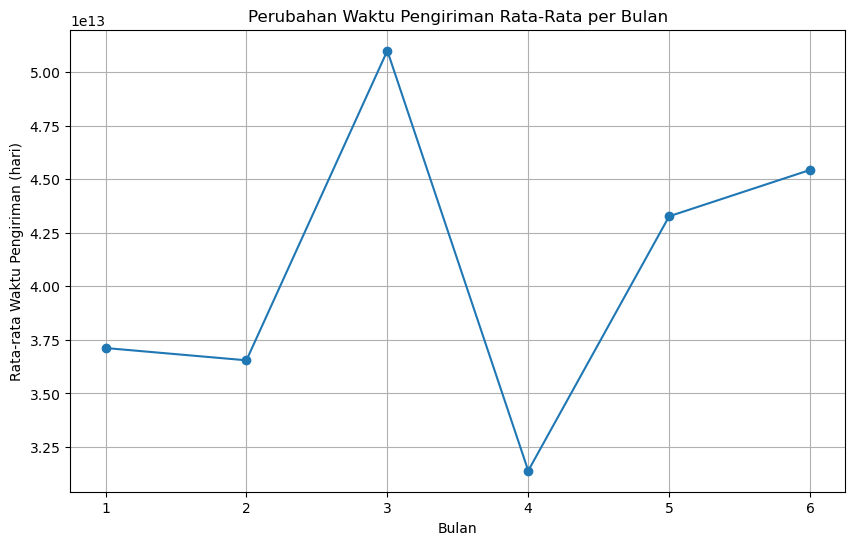

In [9]:
# Menampilkan visualisasi Perubahan Waktu Pengiriman Rata-Rata per Bulan
df['month'] = df['ordering_date'].dt.month
monthly_avg_delivery_time = df.groupby('month')['delivery_time'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_delivery_time.index, monthly_avg_delivery_time.values, marker='o')
plt.title('Perubahan Waktu Pengiriman Rata-Rata per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Waktu Pengiriman (hari)')
plt.grid(True)
plt.show()

Dari data didapat rata-rata waktu pengiriman di bulan 3 keliatan lebih lama dibandingkan bulan lainnya.

## Analisis lanjutan keterlambatan

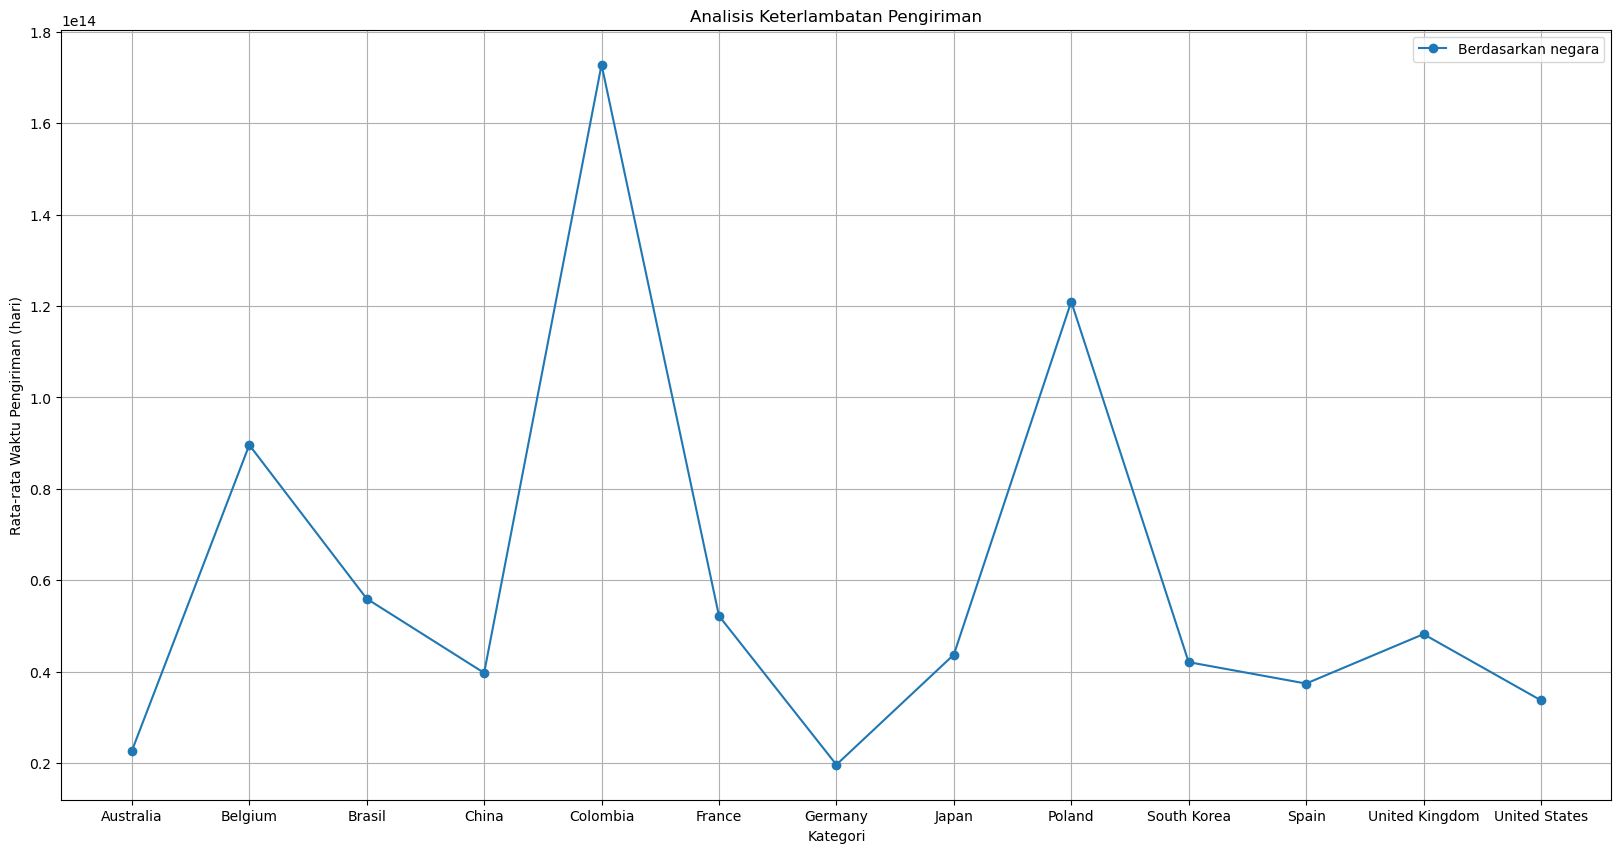

In [10]:
# 1. Analisis keterlambatan berdasarkan negara
a_avg_delivery_time = df.groupby('country')['delivery_time'].mean()

# Visualisasi hasil analisis
plt.figure(figsize=(20, 10))
plt.plot(a_avg_delivery_time.index, a_avg_delivery_time.values, marker='o', label='Berdasarkan negara')
plt.title('Analisis Keterlambatan Pengiriman')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Waktu Pengiriman (hari)')
plt.legend()
plt.grid(True)
plt.show()

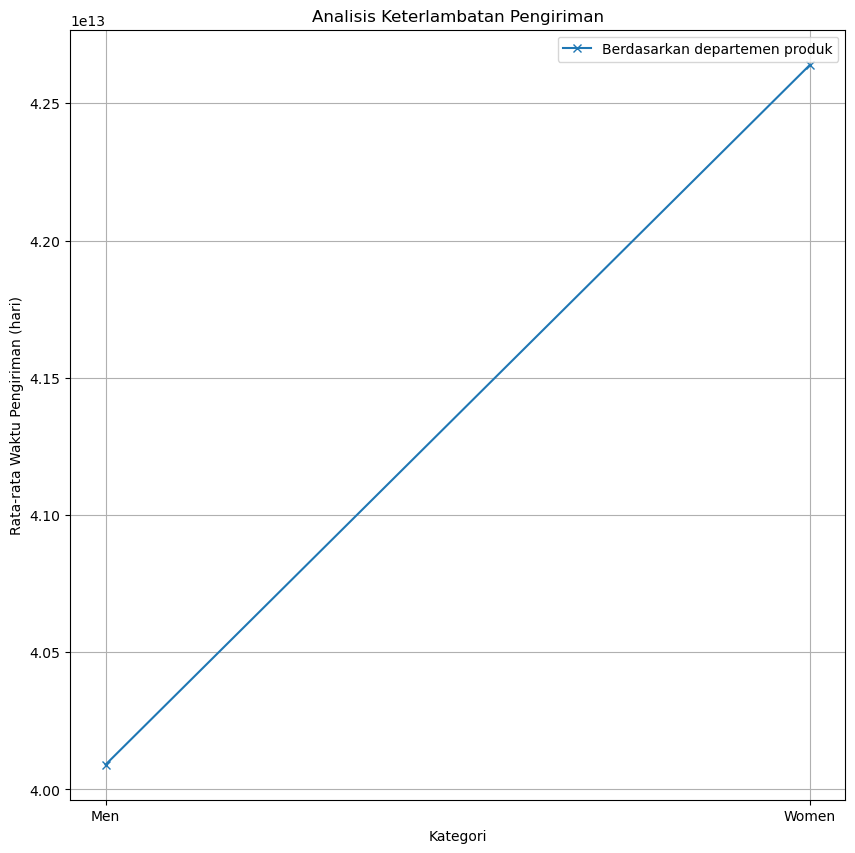

In [11]:
# 2. Analisis keterlambatan berdasarkan departemen produk
b_avg_delivery_time = df.groupby('product_department')['delivery_time'].mean()

# Visualisasi hasil analisis
plt.figure(figsize=(10, 10))
plt.plot(b_avg_delivery_time.index, b_avg_delivery_time.values, marker='x', label='Berdasarkan departemen produk')
plt.title('Analisis Keterlambatan Pengiriman')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Waktu Pengiriman (hari)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Filter data hanya untuk bulan Maret
data_march = df[df['month'] == 3]

# Hapus baris dengan nilai null pada kolom waktu pengiriman dan negara
data_march = data_march.dropna(subset=['delivery_time', 'country'])

# Buat daftar dari kelompok negara
countries = data_march['country'].unique()

# Buat daftar kelompok pengiriman waktu untuk setiap negara
delivery_time_groups = [data_march[data_march['country'] == country]['delivery_time'].dt.days for country in countries]

# Lakukan uji ANOVA
f_statistic, p_value = f_oneway(*delivery_time_groups)

# Nilai ambang batas (signifikansi)
alpha = 0.05

# Cetak hasil uji statistik
print("Hasil Uji ANOVA:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretasi hasil
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam keterlambatan pengiriman antara negara-negara.")
else:
    print("Tidak terdapat perbedaan signifikan dalam keterlambatan pengiriman antara negara-negara.")

Hasil Uji ANOVA:
F-statistic: 0.9331710271010832
P-value: 0.5020168293891032
Tidak terdapat perbedaan signifikan dalam keterlambatan pengiriman antara negara-negara.


Identifikasi Alasan Keterlambatan Pengiriman:

* Identifikasi faktor-faktor yang mungkin menyebabkan keterlambatan pengiriman, seperti peningkatan pesanan atau masalah dengan penyedia pengiriman.
* Analisis lebih lanjut mungkin diperlukan untuk menentukan penyebab keterlambatan secara lebih mendalam.

## Problem 2

Stock Performance Analysis (Analisis Kinerja Stok):

* Hitung jumlah produk yang tersedia (stok) selama kuartal pertama hingga kuartal kedua 2023.
* Analisis perubahan stok dari waktu ke waktu dan hubungannya dengan tingkat penjualan. Apakah ada tren penjualan tertentu yang mempengaruhi stok?

In [13]:
# 1. Hitung Jumlah Stok
total_stock_in = df['inventory_in_date'].count()
total_stock_out = df['inventory_out_date'].count()
total_stock = total_stock_in - total_stock_out
print(f"Jumlah produk yang tersedia selama kuartal pertama hingga kuartal kedua 2023: {total_stock}")

Jumlah produk yang tersedia selama kuartal pertama hingga kuartal kedua 2023: 2053


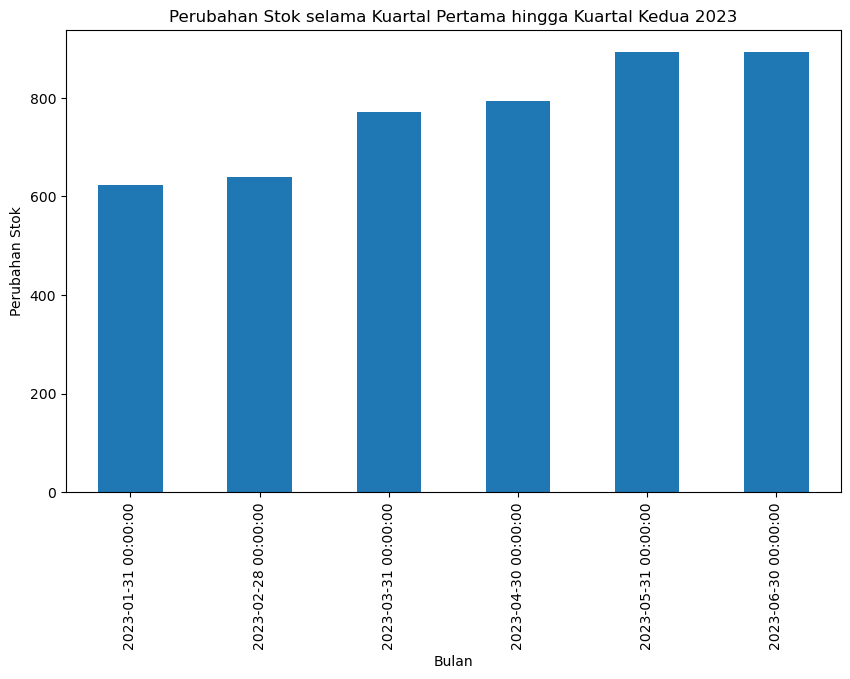

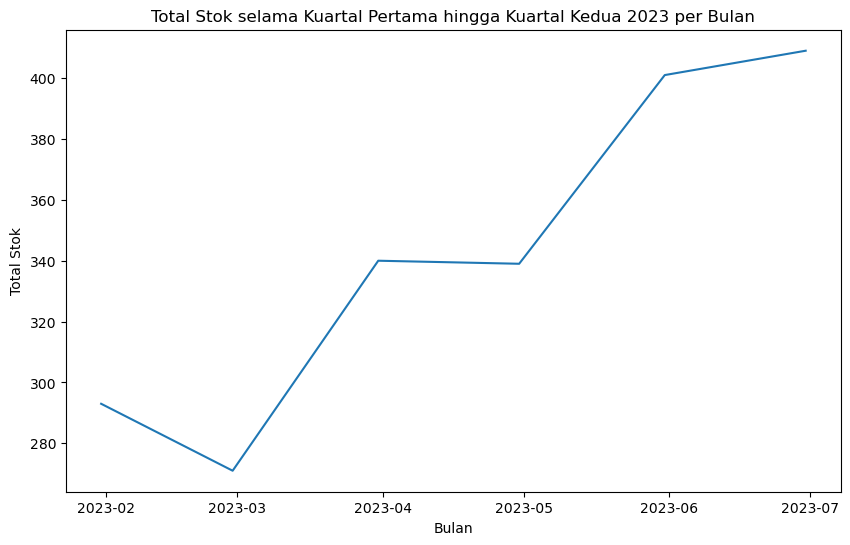

In [14]:
# 2. Analisis Perubahan Stok
stock_changes = df.groupby(pd.Grouper(key='ordering_date', freq='M'))['id'].count()

# Hitung total stok per bulan
total_stock_in_per_month = df.groupby(pd.Grouper(key='ordering_date', freq='M'))['inventory_in_date'].count()
total_stock_out_per_month = df.groupby(pd.Grouper(key='ordering_date', freq='M'))['inventory_out_date'].count()
total_stock_per_month = total_stock_in_per_month - total_stock_out_per_month

# Plot grafik bar untuk perubahan stok
stock_changes.plot(kind='bar', figsize=(10, 6))
plt.title('Perubahan Stok selama Kuartal Pertama hingga Kuartal Kedua 2023')
plt.xlabel('Bulan')
plt.ylabel('Perubahan Stok')
plt.show()

# Plot grafik garis untuk total stok per bulan
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_stock_per_month.index, y=total_stock_per_month.values)
plt.title('Total Stok selama Kuartal Pertama hingga Kuartal Kedua 2023 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Stok')
plt.show()

In [15]:
# 3. Hubungan dengan Penjualan

# Mengambil data penjualan
sales_data = df[['inventory_out_date', 'sale_price']]

# Mengelompokkan data penjualan berdasarkan bulan dan menghitung total penjualan per bulan
monthly_sales = sales_data.groupby(pd.Grouper(key='inventory_out_date', freq='M'))['sale_price'].sum()

# Menggabungkan data penjualan dan perubahan stok per bulan
monthly_data = pd.concat([stock_changes, monthly_sales], axis=1)
monthly_data.columns = ['Perubahan Stok', 'Total Penjualan']

# Menghitung korelasi Pearson antara perubahan stok dan penjualan
correlation = monthly_data['Perubahan Stok'].corr(monthly_data['Total Penjualan'])
print(f"Korelasi antara perubahan stok dan penjualan (sold_price) adalah: {correlation:.2f}")

Korelasi antara perubahan stok dan penjualan (sold_price) adalah: 0.96


Dari data didapat:
* Jumlah produk yang tersedia selama kuartal pertama hingga kuartal kedua 2023 sebanyak 2053 buah.
* Terdapat kenaikan yang konsisten selama 5 bulan konsekutif, hal ini dapat berkemungkinan potensi tren bisnis jika terus berlanjut.
* Terdapat korelasi positif kuat antara perubahan stok dan penjualan (sold_price) sehingga dapat disimpulkan jika perubahan stok meningkat maka penjualan meningkat dan begitu juga sebaliknya.

Hubungannya dengan Tingkat Penjualan:

* Analisis hubungan antara perubahan stok dan tingkat penjualan. Apakah ada tren penjualan tertentu yang mempengaruhi stok?

## Problem 3

Korelasi antara Pengiriman dan Stok:

* Analisis apakah ada korelasi antara waktu pengiriman dan ketersediaan stok. Misalnya, apakah keterlambatan pengiriman terkait dengan ketidakcukupan stok?

In [16]:
# Mengambil data terkait
df_filtered = df.dropna(subset=['delivery_time', 'inventory_in_date'])

# Mengonversi kolom delivery time dan inventory in date ke dalam tipe data datetime
df_filtered['delivery_time'] = pd.to_timedelta(df_filtered['delivery_time'])
df_filtered['inventory_in_date'] = pd.to_datetime(df_filtered['inventory_in_date'])

# Menghitung korelasi antara delivery time dan inventory in date
correlation = df_filtered['delivery_time'].dt.total_seconds().corr(df_filtered['inventory_in_date'].dt.dayofyear)
print(f"Korelasi antara waktu pengiriman dan ketersediaan stok: {correlation}")

Korelasi antara waktu pengiriman dan ketersediaan stok: -0.01487160513952462


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_21116\1319391814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['delivery_time'] = pd.to_timedelta(df_filtered['delivery_time'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_21116\1319391814.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['inventory_in_date'] = pd.to_datetime(df_filtered['inventory_in_date'])


Dari data didapat bahwa tidak ada korelasi antara waktu pengiriman dan ketersediaan stok sehingga hal ini dapat diabaikan.